In [1]:
from importlib.metadata import version

print("torch version:", version("torch"))
print("tiktoken version:", version("tiktoken"))

torch version: 2.5.1
tiktoken version: 0.8.0


### We are here

* Data Preparation and sapmling to get input data ready for LLM

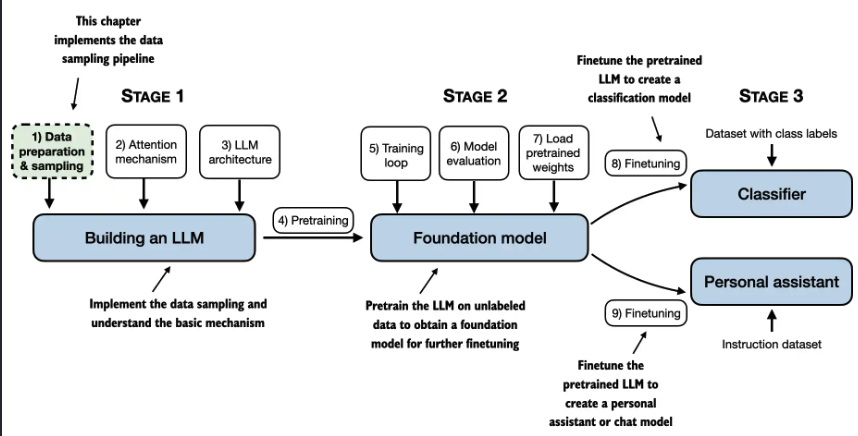

## 1. Understanding word Embeddings

Embeddings are vector representation of descrete objects into dense representations, for example words, texts, paragraphs, etc

They are usually a pretrained neural network model. 

One of the earliest is `Word2Vec` [link](https://arxiv.org/abs/1301.3781)

## 2. Text Tokenisation

In a nutshell, Tokenisation is process of breaking text into smaller units.



In [2]:
import os
import urllib.request

if not os.path.exists("the-verdict.txt"):
    url = ("https://raw.githubusercontent.com/rasbt/"
           "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
           "the-verdict.txt")
    file_path = "the-verdict.txt"
    urllib.request.urlretrieve(url, file_path)

In [3]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [4]:
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


### 2.1 Develping Simple Tokenizer using regex expression

In [5]:
import re

text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


* Splitting on commas and periods, needs to be done

* Case is preserved as to make LLM aware of proper nowns & common nouns, understanding sentence strucrure

In [6]:
result = re.split(r'([,.]|\s)', text)

print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


* Above still contains whitespace chracters, optionally this can be removed. 
  
  a.) In Coding whitespaces would be required 

> keeping whitespaces can be useful if we train models that are sensitive to the exact structure of the text (for example, Python code, which is sensitive to indentation and spacing). Here, we remove whitespaces for simplicity and brevity of the tokenized outputs. Later, we will switch to a tokenization scheme that includes whitespaces.`

In [ ]:
result = [item for item in result if item.strip()]
result

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']

* Adding punctuation marks into tokenisation process

In [8]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


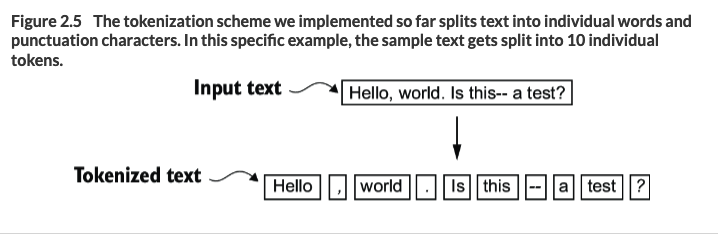

In [9]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))

4690


In [11]:
len(set(preprocessed))

1130

In [12]:
## Looking at first 30 tokens
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


## 3. Converting tokens into token IDs

A vocabulary is created which basically a dictionary which maps tokens (Str )to Token IDs (Integer) representation. 
> This is essentially size of unique tokens in training data

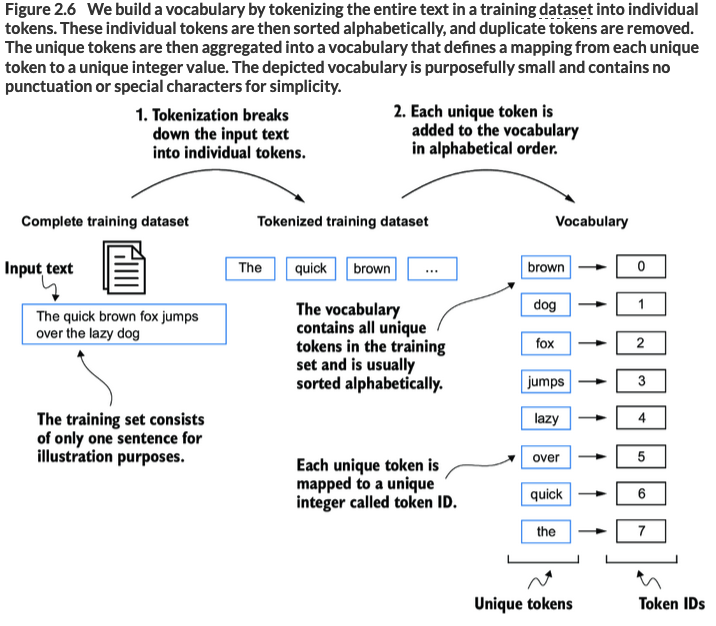

In [13]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size)

1130
